In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [ ]:
data = pd.read_csv('./results_htsinfer/zavolan_rnaseq_samples_filtered_result.csv')

#### Barplots for matches

NameError: name 'data' is not defined

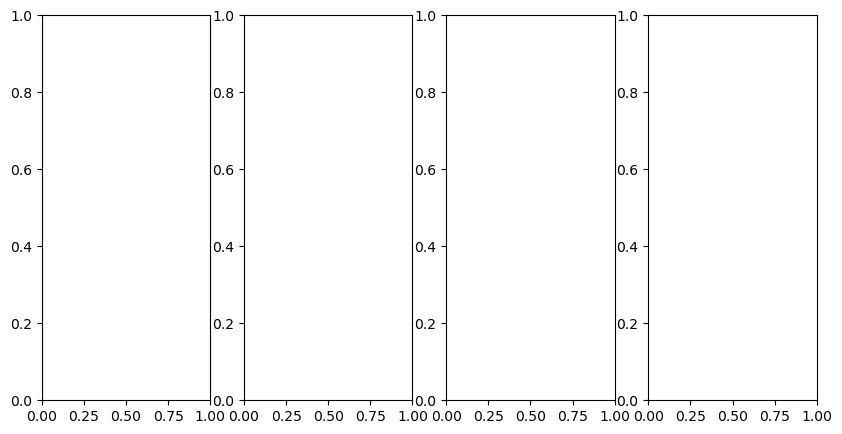

In [3]:
# List of 'match' columns
match_columns = ['match_org', 'match_orient', 'match_adapter', 'match_length']

# Define the colors for each category
colors = {'True': 'green', 'False': 'red', 'Undecided': 'blue'}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(match_columns), figsize=(10, 5))

# Create bar plots for each 'match' column
for i, column in enumerate(match_columns):
    # Count the occurrences of each value
    value_counts = data[column].value_counts()
    
    # Calculate the percentage for each value
    percentages = value_counts / value_counts.sum() * 100

    # Define the order of x-axis labels
    order = value_counts.index.tolist()
    
    # Create the bar plot
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=order)
    
    # Add labels to the bars
    for j, v in enumerate(value_counts.values):
        ax.text(j, v, f'{v}', ha='center', va='bottom', fontsize=8)
        ax.text(j, v, f'({percentages[j]:.1f}%)', ha='center', va='top', fontsize=8)
    
    # Set the plot title and labels
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig("zavolan_rnaseq_samples_matches.png", dpi=250, bbox_inches='tight')

#### Barplots for organism match

In [4]:
data_most_common = data.loc[data['org'].isin(
    ['hsapiens', 'mmusculus', 'athaliana', 'dmelanogaster', 'drerio', 'rnorvegicus', 'zmays', 'mmulatta', 'scerevisiae', 'osativa']
)].copy()

category_counts_all = np.unique(data_most_common['match_org_all'], return_counts=True)
percentages_all = category_counts_all[1] / len(data_most_common) * 100

category_counts_100 = np.unique(data_most_common['match_org_100'], return_counts=True)
percentages_100 = category_counts_100[1] / len(data_most_common) * 100


fig, ax = plt.subplots(1,2, figsize=(10, 5), gridspec_kw={'width_ratios': [.5, .5]})
g = sns.barplot(data=data_most_common, x=category_counts_all[0], y=percentages_all, palette="Blues", ax=ax[0])
g.set(xlabel="Match Category", ylabel="Percentage")
g.bar_label(g.containers[0], fmt='%.f%%')
g.set(title='Matched organism %, 10 most frequent organisms' + '\nAll organism transcripts' 
       + '\nLibrary source min-match percentage: 2' 
       + '\nLibrary source min frequency ratio: 2')
f = sns.barplot(data=data_most_common, x=category_counts_100[0], y=percentages_100, palette="Blues", ax=ax[1])
f.set(xlabel="Match Category", ylabel="Percentage")
f.bar_label(f.containers[0], fmt='%.f%%')
f.set(title='Matched organism %, 10 most frequent organisms' + '\n100 most frequent organism transcripts' 
       + '\nLibrary source min-match percentage: 2' 
       + '\nLibrary source min frequency ratio: 2')
plt.savefig("org_test_results.png", dpi=250, bbox_inches='tight')

NameError: name 'data' is not defined

#### Histograms for predicted adapters

In [5]:
# Histogram of 1st predicted adapter percent #1
# # Drop 0 percentages of both SE and PE reads
result_final_n = result_final.drop(result_final[
    (result_final['1_percent_1'] == 0) &
    (result_final['2_percent_1'] == 0) |
    (result_final['1_percent_1'] == 0) &
    result_final['2_percent_1'].isna()].index)
all_percent = pd.concat([result_final_n['1_percent_1'],
                            result_final_n['2_percent_1']])
all_percent = all_percent[all_percent != 0]
fig, axs = plt.subplots(1, figsize=[8, 8])
sns.histplot(data=all_percent, binwidth=2).set(
    title='Fraction of reads containing most '
            + 'prevalent adapter\nID: ' + str(results_folder)
            + '\nNo. of records: ' + str(records)
            + '\nRead layout min-match percentage: ' + str(min_match)
            + '\nRead layout min frequency ratio: ' + str(min_freq))
plt.xlim(0, 100)
plt.savefig(str(RESULTS_HTS_DIR) + '/' + str(results_folder)
            + '/2_Hist_1st_pred_adapter_full.png', dpi=100)

# Histogram of 1st predicted adapter percent #2
fig, axs = plt.subplots(1, figsize=[8, 8])
sns.histplot(data=all_percent, binwidth=0.2).set(
    title='Fraction of reads containing most '
            + 'prevalent adapter\nID: '
            + str(results_folder)
            + '\nNo. of records: ' + str(records)
            + '\nRead layout min-match percentage: ' + str(min_match)
            + '\nRead layout min frequency ratio: ' + str(min_freq))
plt.xlim(0, 10)
plt.savefig(str(RESULTS_HTS_DIR) + '/' + str(results_folder)
            + '/3_Hist_1st_pred_adapter_10.png', dpi=100)

# Histogram of 1st vs 2nd predicted adapter ratio
result_final_n = result_final.drop(result_final[
    (result_final['1_percent_1'] == 0) &
    (result_final['2_percent_1'] == 0) |
    (result_final['1_percent_1'] == 0) &
    result_final['2_percent_1'].isna()].index)
result_final_n['1_ratio'] = (
    result_final_n['1_percent_1'] / (
        result_final_n['1_percent_2'] + 0.01))
result_final_n['2_ratio'] = (
    result_final_n['2_percent_1'] / (
        result_final_n['2_percent_2'] + 0.01))
all_ratios = pd.concat(
    [result_final_n['1_ratio'], result_final_n['2_ratio']])
fig, axs = plt.subplots(1, figsize=[8, 8])
sns.histplot(data=all_ratios).set(
    title='Fraction of reads with most prevalent adapter '
    + 'vs. second most prevalent\nID: '
    + str(results_folder)
    + '\nNo. of records: ' + str(records)
    + '\nRead layout min-match percentage: ' + str(min_match)
    + '\nRead layout min frequency ratio: ' + str(min_freq),
    xscale="log")
plt.savefig(str(RESULTS_HTS_DIR) + '/' + str(results_folder)
            + '/4_Hist_1st_vs_2nd_pred_adapter_ratio.png', dpi=100)

NameError: name 'result_final' is not defined

#### Barplots for performance times

In [2]:
import os
import pandas as pd
from pathlib import Path

directory = (Path().resolve() /
             "results_htsinfer")

# Initialize an empty list to store individual dataframes
dfs = []

records_order = ["1k", "5k", "10k", "50k", "100k", "500k", "1mil", "5mil", "10mil", "50mil", "100mil", "0def"]

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith("_result.csv"):
        # Extract the relevant part of the filename
        records = filename.split("_")[3]
        
        # Read the CSV file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        transformed_df = pd.DataFrame(columns=['sample', 'process', 'duration'])

        # Iterate over each row in the original dataframe
        for _, row in df.iterrows():
            sample = row['sample']
            
            # Iterate over each process column
            for process in ['processing_time', 'extract_time', 'kallisto_time', 'align_time', 'cutadapt_time', 'total_time']:
                duration = row[process]
                
                # Append new row to the transformed dataframe
                transformed_df = transformed_df.append({'sample': sample, 'process': process, 'duration': duration}, ignore_index=True)
        
        
        # Add a new column with the records information
        transformed_df['records'] = records
        
        # Append the modified dataframe to the list
        dfs.append(transformed_df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Order dataframe according to 'records'
data_ordered = data.set_index('records')
data_ordered = data_ordered.reset_index()
data_ordered['records'] = pd.Categorical(data_ordered['records'], categories=records_order)

data_ordered = data_ordered.sort_values(['records'])

/scratch/ipykernel_95273/3773374480.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(["Process records", "Extract read length", "Kallisto quantification", "STAR Alignment", "Cutadapt"], rotation=45)
/scratch/ipykernel_95273/3773374480.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(["Total HTSinfer run"], rotation=45)


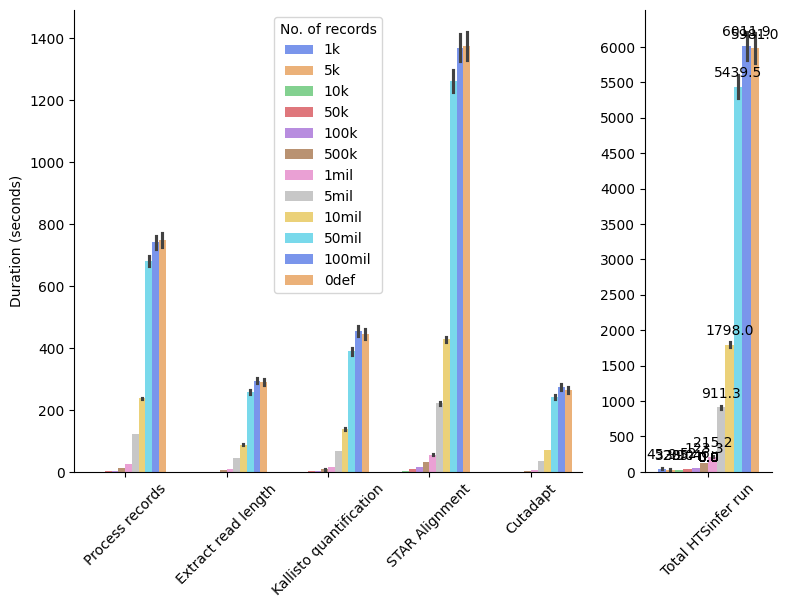

In [3]:
data_5 = data_ordered.loc[data_ordered['process'].isin(['processing_time','extract_time','kallisto_time','align_time','cutadapt_time'])].copy()
data_total = data_ordered.loc[data_ordered['process'] == 'total_time'].copy()

# Replace NaN values in 'duration' column with zeros
data_5['duration'].fillna(0, inplace=True)
data_total['duration'].fillna(0, inplace=True)

fig, ax = plt.subplots(1,2, figsize=(9, 6), gridspec_kw={'width_ratios': [.80, .20]})
g = sns.barplot(data=data_5, x='process', y='duration', hue='records', errorbar='se', palette="bright", alpha=.6, ax=ax[0], order = ['processing_time','extract_time','kallisto_time','align_time','cutadapt_time'])
g.set(xlabel="", ylabel="Duration (seconds)")
g.set_xticklabels(["Process records", "Extract read length", "Kallisto quantification", "STAR Alignment", "Cutadapt"], rotation=45)
g.legend(title="No. of records")

f = sns.barplot(data=data_total, x='process', y='duration', hue='records', errorbar='se', palette="bright", alpha=.6, ax=ax[1])
f.set(xlabel="", ylabel="")
f.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000])
f.set_xticklabels(["Total HTSinfer run"], rotation=45)
f.legend_.remove()

# Add annotations for each bar in the second plot
for p in f.patches:
    f.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.despine()
plt.savefig("perf_test_results_0719.png", dpi=250, bbox_inches='tight')

In [5]:
import scipy

df = data_ordered[data_ordered['process'] == 'total_time']

df_rep = df.replace({'records' : {
     '1k' : 1000,
     '5k' : 5000,
     '10k' : 10000,
     '50k' : 50000,
     '100k' : 100000,
     '500k' : 500000,
     '1mil' : 1000000,
     '5mil' : 5000000,
     '10mil' : 10000000,
     '50mil' : 50000000,
     '100mil' : 100000000,
     '0def': 0
     }}).fillna(0)

df_rep['records'] = df_rep['records'].astype(int)

# Step 1: Create a pivot table with custom aggregation (using 'first')
pivot_table = df_rep.pivot_table(index='sample', columns='records', aggfunc='first')

# Step 2: Flatten the multi-index column headers
pivot_table.columns = [f'{col}_{rec}' for col, rec in pivot_table.columns]

# Step 3: Reset the index to get the final transformed dataframe
result_dataframe = pivot_table.reset_index()

# Display the result
print(result_dataframe)


          sample  duration_0  duration_1000  duration_5000  duration_10000  \
0    SRR10172939     17903.0           88.0           16.0            18.0   
1    SRR10172940     15525.0           14.0           16.0            18.0   
2    SRR10172941     14683.0           15.0           15.0            18.0   
3    SRR10393299      1998.0           15.0           95.0            77.0   
4    SRR10409017      4378.0           15.0           19.0            24.0   
..           ...         ...            ...            ...             ...   
760   SRR9904894      4080.0           15.0           15.0            17.0   
761   SRR9904898      4023.0           15.0           15.0            17.0   
762   SRR9904900      4450.0           15.0           14.0            17.0   
763   SRR9904902      4843.0          115.0           15.0            17.0   
764   SRR9958771      2004.0           13.0           13.0            13.0   

     duration_50000  duration_100000  duration_500000  duration

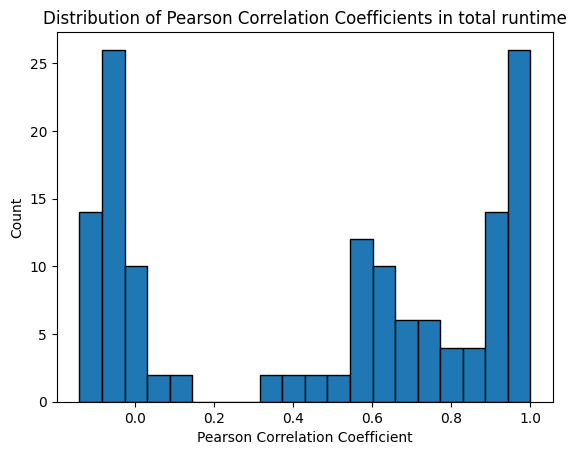

In [6]:
df = result_dataframe
correlation_df = df.drop('sample', axis=1).corr()

plt.hist(correlation_df.values.flatten(), bins=20, ec='black')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Count')
plt.title('Distribution of Pearson Correlation Coefficients in total runtime')
plt.show()

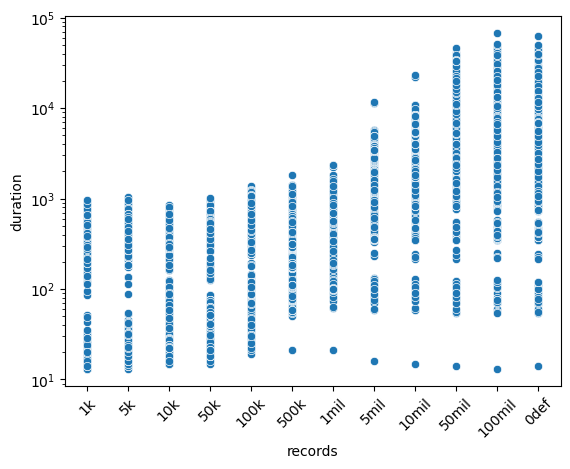

In [97]:
# sns.kdeplot(data=df_rep, x='records', y='duration')
# sns.barplot(data=df_rep, x='process', y='duration', hue='records')
df = data_ordered[data_ordered['process'] == 'total_time']

sns.scatterplot(data=df, x='records', y='duration')
plt.xticks(rotation=45)
plt.yscale('log')

### Barplot showing state changes

In [2]:
import os
import pandas as pd
from pathlib import Path

directory = (Path().resolve() /
             "results_htsinfer")

# Initialize an empty list to store individual dataframes
dfs = []

records_order = ["1k", "5k", "10k", "50k", "100k", "500k", "1mil", "5mil", "10mil", "50mil", "100mil", "0def"]

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith("_result.csv"):
        # Extract the relevant part of the filename
        records = filename.split("_")[3]
        
        # Read the CSV file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        df = df[['sample', 'match_org', 'match_orient', 'match_adapter', 'match_length']]

        # Add a new column with the records information
        df['records'] = records

        # Append the modified dataframe to the list
        dfs.append(df)       

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# Order dataframe according to 'records'
data_ordered = data.set_index('records')
data_ordered = data_ordered.reset_index()
data_ordered['records'] = pd.Categorical(data_ordered['records'], categories=records_order)

data_ordered = data_ordered.sort_values(['records'])

/scratch/ipykernel_89620/1306748381.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)
/scratch/ipykernel_89620/1306748381.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(f.get_xticklabels(), rotation=45)
/scratch/ipykernel_89620/1306748381.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=45)
/scratch/ipykernel_89620/1306748381.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  k.set_xticklabels(k.get_xticklabels(), rotation=45)


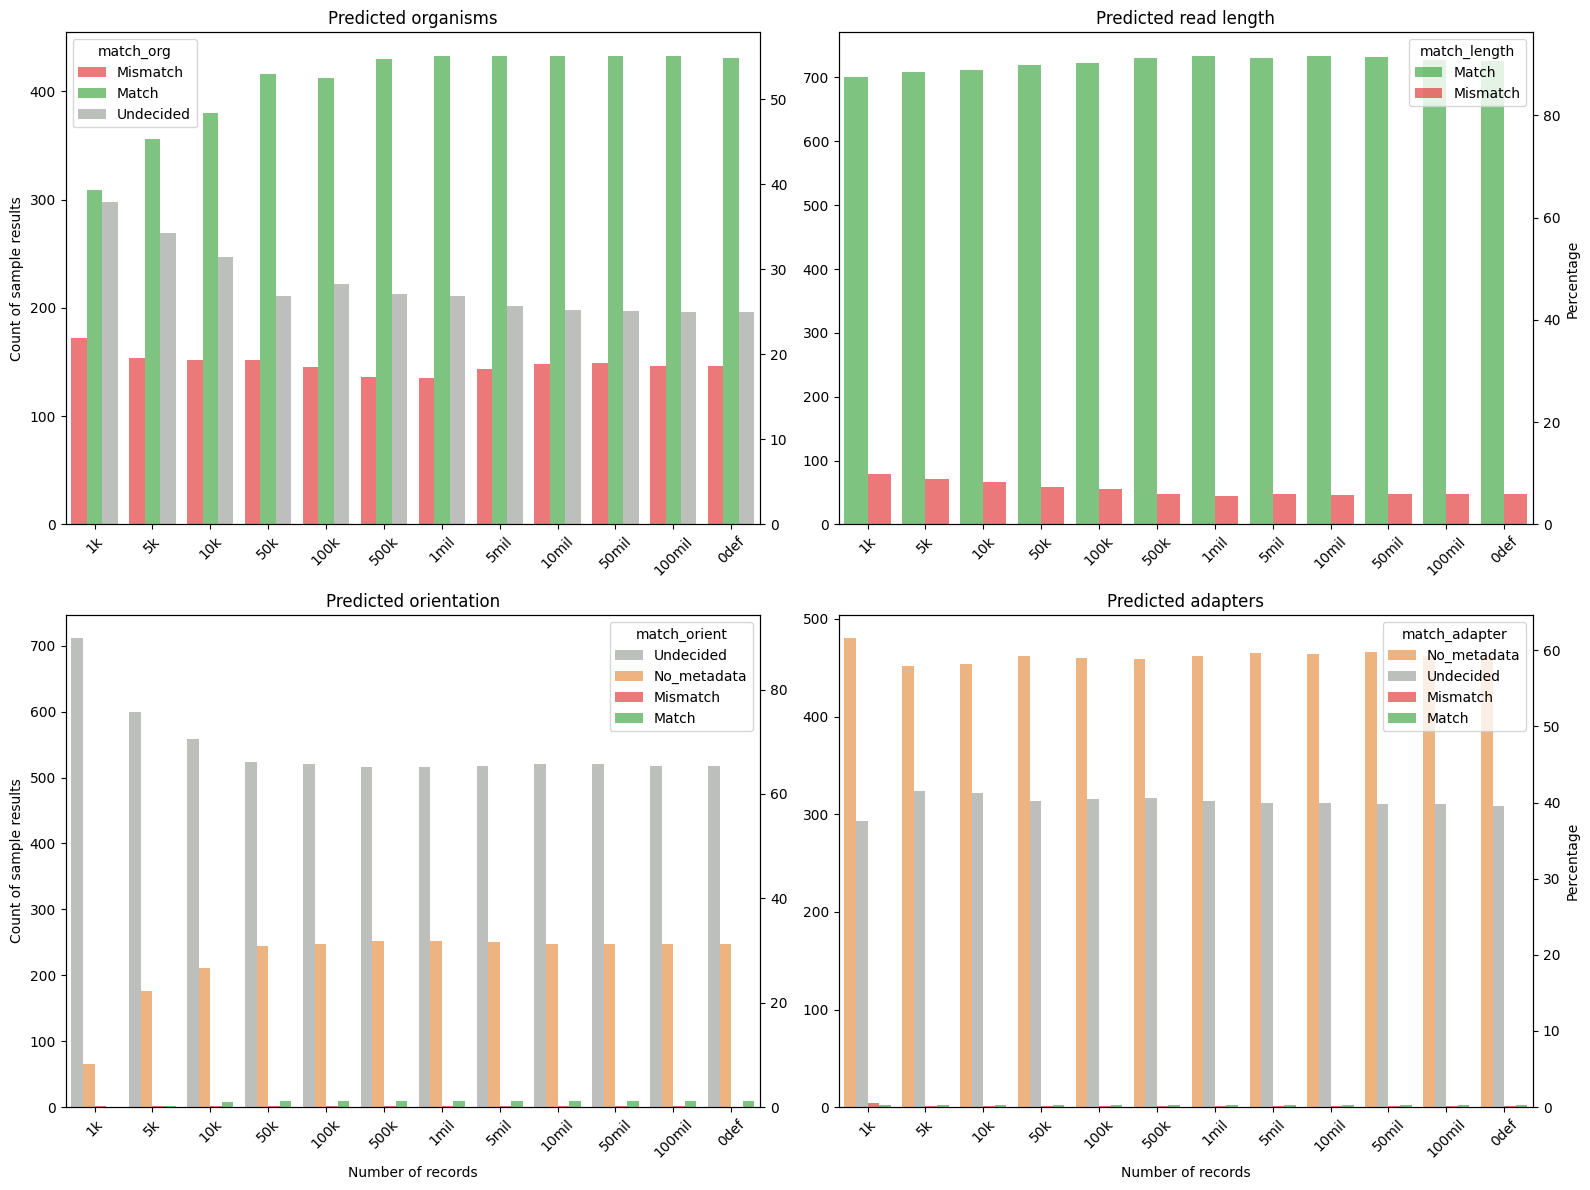

In [3]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order for 'records' to ensure proper sorting on the plots
records_order = ["1k", "5k", "10k", "50k", "100k", "500k", "1mil", "5mil", "10mil", "50mil", "100mil", "0def"]
data_ordered['records'] = pd.Categorical(data_ordered['records'], categories=records_order, ordered=True)
colors = {'Match': "#15B01A", 'Mismatch': "#FF0000", 'Undecided': "#929591", 'No_metadata': "#FF7F0E"}

fig, ax = plt.subplots(2,2, figsize=(16, 12), gridspec_kw={'width_ratios': [.50, .50]})
g = sns.countplot(data=data_ordered, x='records', hue='match_org', palette=colors, alpha=.6, ax=ax[0, 0])
g.set(xlabel="", ylabel="Count of sample results")
g.set_title("Predicted organisms")
df1 = data_ordered.groupby('records')['match_org'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
ax_subplot = g.twinx()  # Create a twin axis for percent scale
ax_subplot.set_ylim(0, df1['percent'].max() + 2)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

f = sns.countplot(data=data_ordered, x='records', hue='match_length', palette=colors, alpha=.6, ax=ax[0, 1])
f.set(xlabel="", ylabel="")
f.set_title("Predicted read length")
df1 = data_ordered.groupby('records')['match_length'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
ax_subplot = f.twinx()  # Create a twin axis for percent scale
ax_subplot.set_ylim(0, df1['percent'].max() + 2)
ax_subplot.set_ylabel("Percentage")
f.set_xticklabels(f.get_xticklabels(), rotation=45)

h = sns.countplot(data=data_ordered, x='records', hue='match_orient', palette=colors, alpha=.6, ax=ax[1, 0])
h.set(xlabel="Number of records", ylabel="Count of sample results")
h.set_title("Predicted orientation")
df1 = data_ordered.groupby('records')['match_orient'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
ax_subplot = h.twinx()  # Create a twin axis for percent scale
ax_subplot.set_ylim(0, df1['percent'].max() + 3)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

k = sns.countplot(data=data_ordered, x='records', hue='match_adapter', palette=colors, alpha=.6, ax=ax[1, 1])
k.set(xlabel="Number of records", ylabel="")
k.set_title("Predicted adapters")
df1 = data_ordered.groupby('records')['match_adapter'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
ax_subplot = k.twinx()  # Create a twin axis for percent scale
ax_subplot.set_ylim(0, df1['percent'].max() + 3)
ax_subplot.set_ylabel("Percentage")
k.set_xticklabels(k.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig("0412_htsinfer_performance_results.png", dpi=250, bbox_inches='tight')

In [10]:
plt = sns.countplot(data=data_ordered, x='records', hue='match_orient', palette=colors, alpha=.6, ax=ax[1, 0])
plt.set(xlabel="Number of records", ylabel="Count of sample results")
plt.set_title("Predicted orientation")
df1 = data_ordered.groupby('records')['match_orient'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
ax_subplot = h.twinx()  # Create a twin axis for percent scale
ax_subplot.set_ylim(0, df1['percent'].max() + 3)
plt.set_xticklabels(h.get_xticklabels(), rotation=45)

/scratch/ipykernel_95273/48155734.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.set_xticklabels(h.get_xticklabels(), rotation=45)


[Text(0, 0, '1k'),
 Text(1, 0, '5k'),
 Text(2, 0, '10k'),
 Text(3, 0, '50k'),
 Text(4, 0, '100k'),
 Text(5, 0, '500k'),
 Text(6, 0, '1mil'),
 Text(7, 0, '5mil'),
 Text(8, 0, '10mil'),
 Text(9, 0, '50mil'),
 Text(10, 0, '100mil'),
 Text(11, 0, '0def')]

In [29]:
filepath = (Path().resolve() / "results_htsinfer/1117_162517_rec_1mil_result.csv")
df_1mil_org = pd.read_csv(filepath)
df_1mil_org['records'] = '1mil'
filepath = (Path().resolve() / "results_htsinfer/1130_164656_rec_1mil_result_with_errors.csv")
df_1mil_error = pd.read_csv(filepath)
df_1mil_error['records'] = '1mil_mean'
filepath = (Path().resolve() / "results_htsinfer/1130_164656_rec_1mil_result.csv")
df_1mil_final = pd.read_csv(filepath)
df_1mil_final['records'] = '1mil_errors_fixed'


data = pd.concat([df_1mil_org, df_1mil_error, df_1mil_final], axis=0)

/scratch/ipykernel_56921/432842677.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=0)


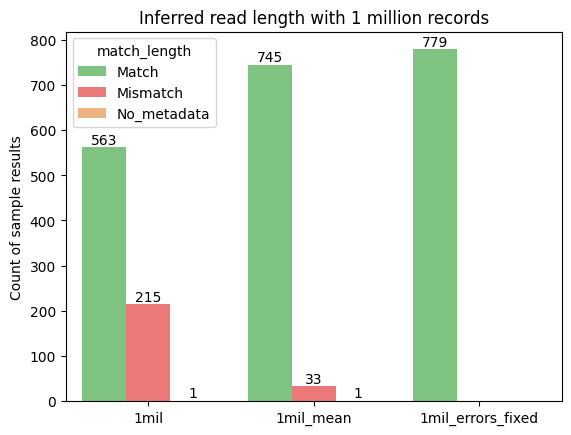

In [30]:
colors = {'Match': "#15B01A", 'Mismatch': "#FF0000", 'Undecided': "#929591", 'No_metadata': "#FF7F0E"}

g = sns.countplot(data=data, x='records', hue='match_length', palette=colors, alpha=.6)
g.set(xlabel="", ylabel="Count of sample results")
g.set_title("Inferred read length with 1 million records")
g.set_xticklabels(g.get_xticklabels(), rotation=0)
for i in g.containers:
    g.bar_label(i,)

plt.savefig("0112_htsinfer_length_results.png", dpi=200, bbox_inches='tight')

In [15]:
df1 = data_ordered.groupby('records')['match_adapter'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

print(round(df1['percent'].max(), -1))

g = sns.catplot(x=x,y='percent',hue='match_adapter',kind='bar',data=df1)
g.ax.set_ylim(0,round(df1['percent'].max(), -1))

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

60.0


NameError: name 'x' is not defined

<Axes: xlabel='concordant_reads', ylabel='Count'>

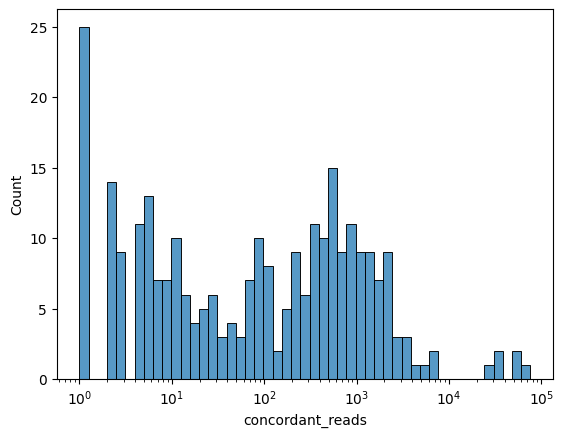

In [13]:
filepath = (Path().resolve() / "results_htsinfer/1204_145128_rec_1mil_concord_result.csv")
df_1mil_concord = pd.read_csv(filepath)

sns.histplot(data=df_1mil_concord, x='concordant_reads', log_scale=True, binwidth=0.1)

### Orientation subset for "Organism match = Match"

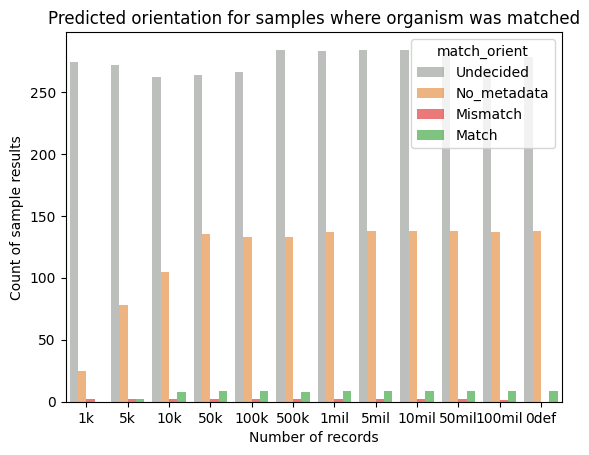

In [4]:
data_org_match_filtered = data_ordered[data_ordered["match_org"] == "Match"]
colors = {'Match': "#15B01A", 'Mismatch': "#FF0000", 'Undecided': "#929591", 'No_metadata': "#FF7F0E"}

sns.countplot(data=data_org_match_filtered, x='records', hue='match_orient', palette=colors, alpha=.6)
plt.xlabel("Number of records")
plt.ylabel("Count of sample results")
plt.title("Predicted orientation for samples where organism was matched")
# h.set_xticklabels(h.get_xticklabels(), rotation=45)
plt.show()

### Sample centric heatmap for sample state changes

In [18]:
import pandas as pd

# Step 1: Create a pivot table with custom aggregation (using 'first')
pivot_table = data_ordered.pivot_table(index='sample', columns='records', aggfunc='first')

# Step 2: Flatten the multi-index column headers
pivot_table.columns = [f'{col}_{rec}' for col, rec in pivot_table.columns]

# Step 3: Reset the index to get the final transformed dataframe
result_dataframe = pivot_table.reset_index()

# Display the result
print(result_dataframe)


          sample match_adapter_1k match_adapter_5k match_adapter_10k  \
0    SRR10172939      No_metadata      No_metadata       No_metadata   
1    SRR10172940        Undecided      No_metadata       No_metadata   
2    SRR10172941      No_metadata      No_metadata       No_metadata   
3    SRR10393299        Undecided      No_metadata       No_metadata   
4    SRR10409017      No_metadata      No_metadata       No_metadata   
..           ...              ...              ...               ...   
761   SRR9904894      No_metadata        Undecided         Undecided   
762   SRR9904898      No_metadata      No_metadata         Undecided   
763   SRR9904900      No_metadata        Undecided         Undecided   
764   SRR9904902      No_metadata      No_metadata       No_metadata   
765   SRR9958771      No_metadata        Undecided         Undecided   

    match_adapter_50k match_adapter_100k match_adapter_500k  \
0         No_metadata        No_metadata        No_metadata   
1        

In [19]:
# Select organism columns
selected_columns = result_dataframe[['sample'] + [col for col in result_dataframe.columns if col.startswith('match_org')]]
organism_df = selected_columns.copy()

# Select length columns
selected_columns = result_dataframe[['sample'] + [col for col in result_dataframe.columns if col.startswith('match_length')]]
length_df = selected_columns.copy()

# Select orientation columns
selected_columns = result_dataframe[['sample'] + [col for col in result_dataframe.columns if col.startswith('match_orient')]]
orient_df = selected_columns.copy()

# Select adapters columns
selected_columns = result_dataframe[['sample'] + [col for col in result_dataframe.columns if col.startswith('match_adapter')]]
adapter_df = selected_columns.copy()

#### Create heatmaps

Text(69.44444444444444, 0.5, 'Samples')

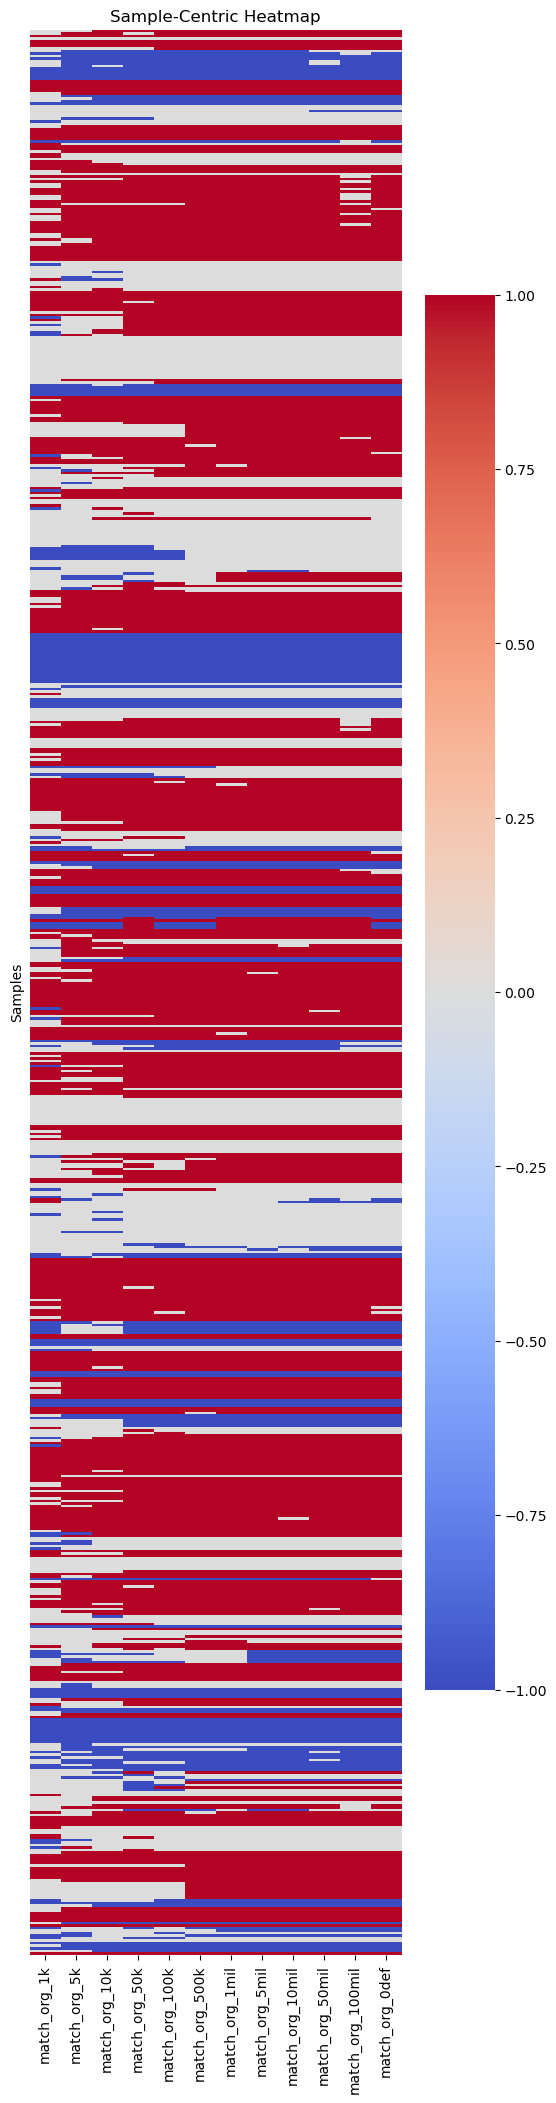

In [20]:
# Replace 'your_data.csv' with the path to your data file
df = organism_df

# Set 'sample_id' as the index for easy tracking
df.set_index('sample', inplace=True)

# Create the heatmap
plt.figure(figsize=(6, 25))
sns.heatmap(df.replace({'Mismatch': -1, 'Match': 1, 'Undecided': 0}),
            cmap='coolwarm', cbar=True, fmt='d', yticklabels=False)
plt.title('Sample-Centric Heatmap')
plt.ylabel('Samples')

<Figure size 600x2500 with 0 Axes>

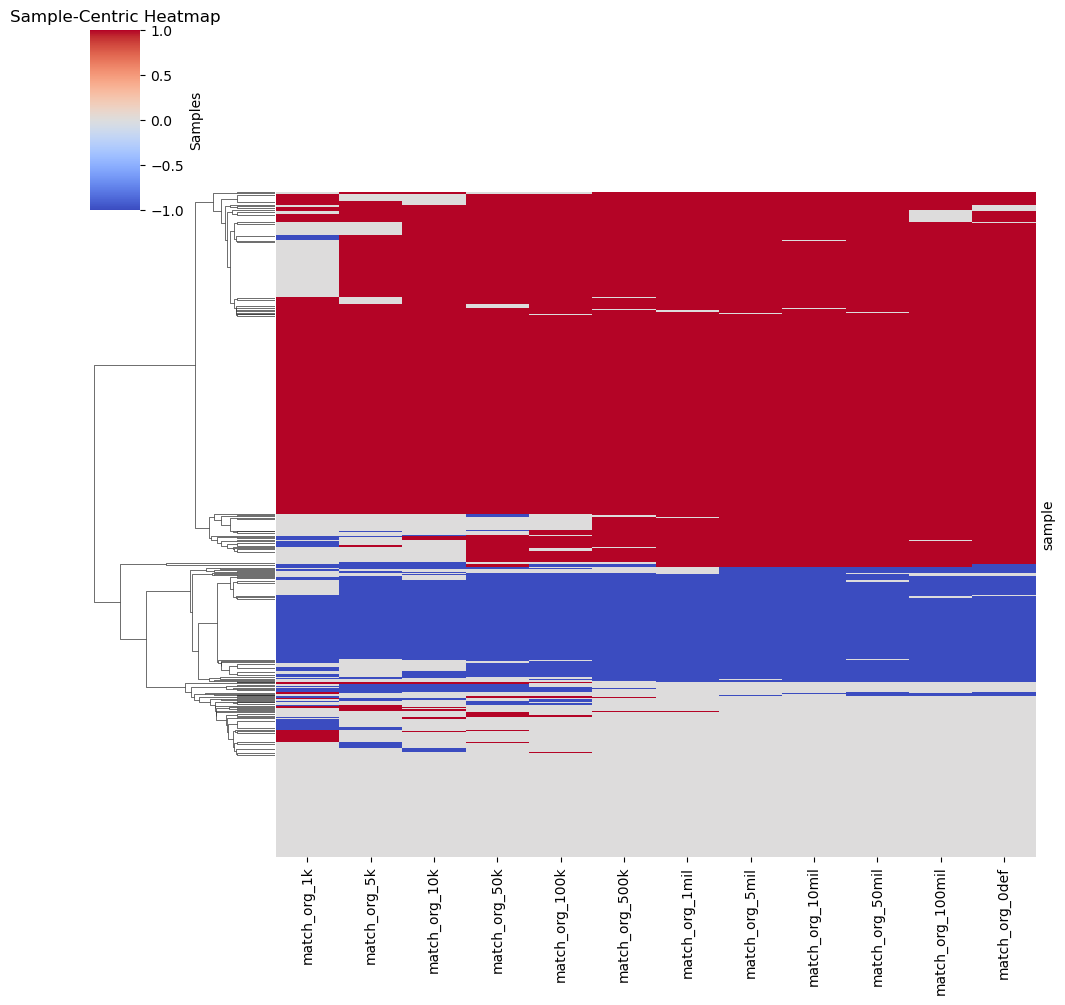

In [21]:
plt.figure(figsize=(6, 25))
sns.clustermap(df.replace({'Mismatch': -1, 'Match': 1, 'Undecided': 0}),
            cmap='coolwarm', cbar=True, fmt='d', yticklabels=False, col_cluster=False)
plt.title('Sample-Centric Heatmap')
plt.ylabel('Samples')
plt.show()

### Create clustered heatmap for all variables for 1 and 10 million records

<Figure size 500x500 with 0 Axes>

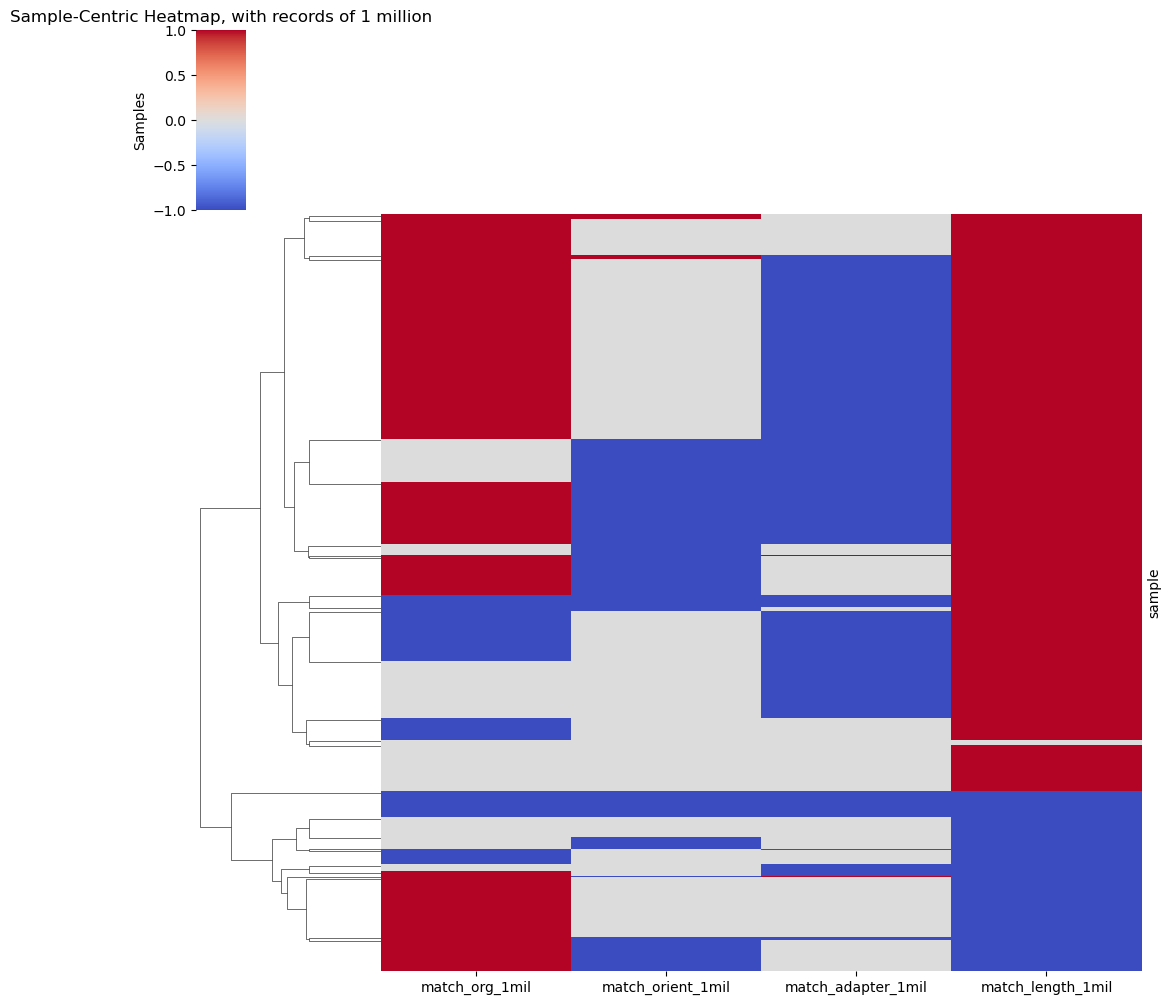

In [106]:
from matplotlib.colors import ListedColormap
# Select all columns for 1 million reads
selected_columns = result_dataframe[['sample'] + [col for col in result_dataframe.columns if col.endswith('_1mil')]]
df_1mil = selected_columns.copy()
df_1mil = df_1mil[['sample', 'match_org_1mil', 'match_orient_1mil', 'match_adapter_1mil', 'match_length_1mil']]
df_1mil.set_index('sample', inplace=True)

colors = ["#FF0000", "lightgray", "#15B01A"]
cmap = ListedColormap(colors)

plt.figure(figsize=(5, 5))
sns.clustermap(df_1mil.replace({'Mismatch': -1, 'Match': 1, 'Undecided': 0}),
            cmap='coolwarm', center=0, cbar=True, fmt='d', yticklabels=False, col_cluster=False,
            cbar_kws = dict(use_gridspec=False, location="left"))
plt.title('Sample-Centric Heatmap, with records of 1 million')
plt.ylabel('Samples')
plt.show()

<Figure size 500x500 with 0 Axes>

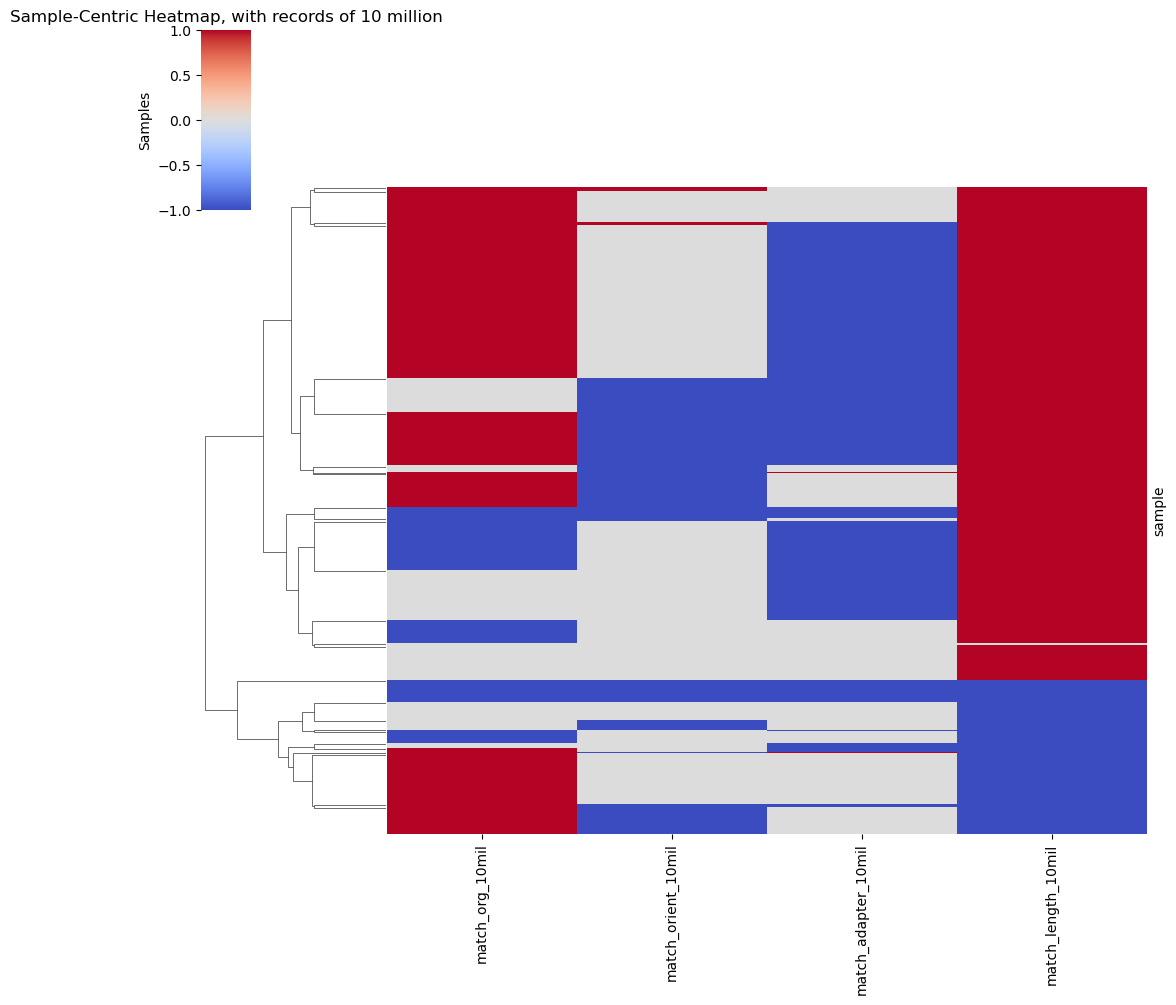

In [107]:
from matplotlib.colors import ListedColormap
# Select all columns for 10 million reads
selected_columns = result_dataframe[['sample'] + [col for col in result_dataframe.columns if col.endswith('_10mil')]]
df_1mil = selected_columns.copy()
df_1mil = df_1mil[['sample', 'match_org_10mil', 'match_orient_10mil', 'match_adapter_10mil', 'match_length_10mil']]
df_1mil.set_index('sample', inplace=True)

colors = ["#FF0000", "lightgray", "#15B01A"]
cmap = ListedColormap(colors)
plt.figure(figsize=(5, 5))
sns.clustermap(df_1mil.replace({'Mismatch': -1, 'Match': 1, 'Undecided': 0}),
            cmap='coolwarm', center=0, cbar=True, fmt='d', yticklabels=False, col_cluster=False,
            cbar_kws = dict(use_gridspec=False, location="left"))
plt.title('Sample-Centric Heatmap, with records of 10 million')
plt.ylabel('Samples')
plt.show()

### Distribution of read counts

In [23]:
from pathlib import Path

MINED_DATA = (Path().resolve() /
              "mined_test_data.tsv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA, sep='\t')

<Figure size 500x500 with 0 Axes>

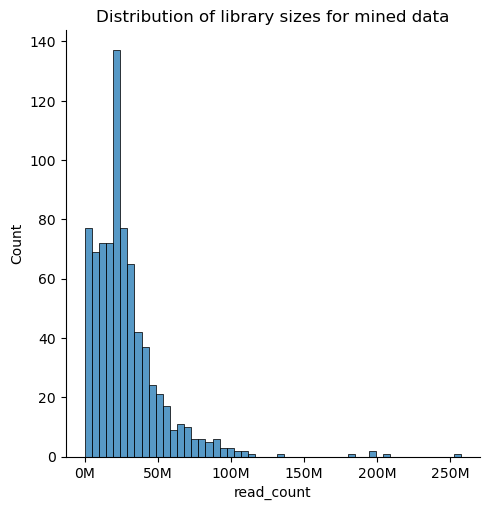

In [24]:
import matplotlib.ticker as tkr
import seaborn as sns

plt.figure(figsize=(5, 5))
g = sns.displot(data, x="read_count").set(title='Distribution of library sizes for mined data')
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
plt.savefig("1708_htsinfer_read_counts.png", dpi=100, bbox_inches='tight')

In [2]:
from pathlib import Path
import seaborn as sns

MINED_DATA = (Path().resolve() /
              "0117_144320_libtype_test_result.csv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA)

rslt_data = data[data["match_org"] != "Undecided"]
# plt.figure(figsize=(1))

g = sns.displot(rslt_data, x="ratio_concordant").set(title='Distribution of concordant read ratios \n(n=255)')
g.set(xticks=np.arange(0,1.05,0.05))
plt.xticks(rotation=45)
g.savefig("1901_dist_concord_1.png", dpi=100)

FileNotFoundError: [Errno 2] No such file or directory: '/scicore/home/zavolan/balajt0000/Work/test_htsinfer/0117_144320_libtype_test_result.csv'

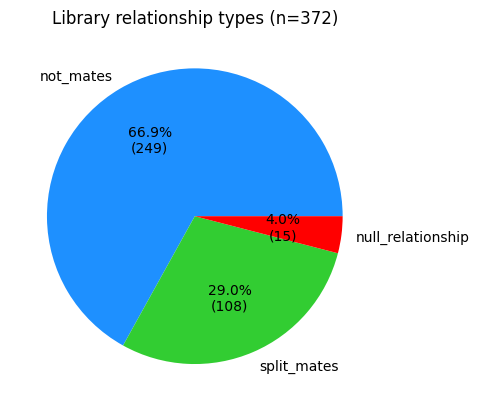

In [55]:
MINED_DATA = (Path().resolve() /
              "0117_144320_libtype_test_result.csv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA)

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

rslt_data = data[data["match_org"] != "Undecided"]
df1 = pd.DataFrame(rslt_data["match_type"].value_counts().reset_index())

plt.title("Library relationship types")
plt.pie(data=df1,x="match_type", labels='index', colors=['dodgerblue', 'limegreen', 'red'], autopct=autopct_format(df1["match_type"]))
plt.show()

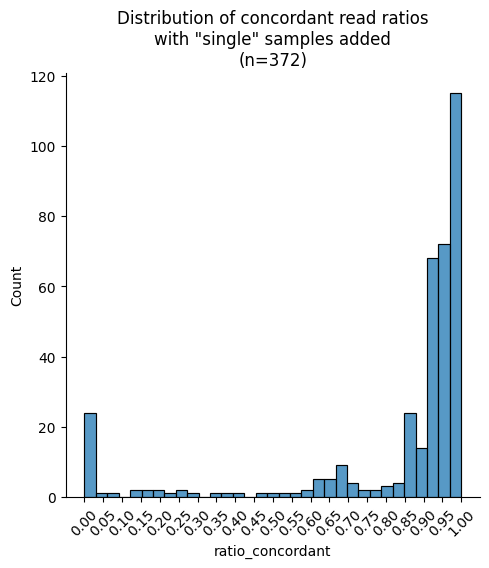

In [13]:
from pathlib import Path
import seaborn as sns

MINED_DATA = (Path().resolve() /
              "0118_135157_libtype_single_test_result.csv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA)

rslt_data = data[data["match_org"] != "Undecided"]
# plt.figure(figsize=(1))
g = sns.displot(rslt_data, x="ratio_concordant").set(title='Distribution of concordant read ratios\nwith \"single\" samples added\n(n=372)')
g.set(xticks=np.arange(0,1.05,0.05))
plt.xticks(rotation=45)
plt.show()
g.savefig("1901_dist_concord_2.png", dpi=100)

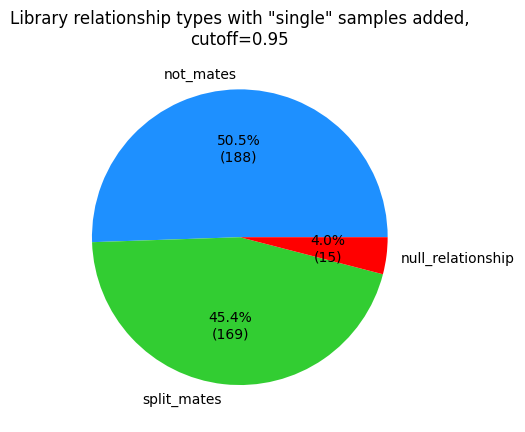

In [77]:
MINED_DATA = (Path().resolve() /
              "0118_135157_libtype_single_test_result.csv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA)

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

rslt_data = data[data["match_org"] != "Undecided"]
df1 = pd.DataFrame(rslt_data["match_type"].value_counts().reset_index())

plt.title("Library relationship types with \"single\" samples added,\ncutoff=0.95")
plt.pie(data=df1,x="match_type", labels='index', colors=['dodgerblue', 'limegreen', 'red'], autopct=autopct_format(df1["match_type"]))
plt.show()

<Figure size 500x500 with 0 Axes>

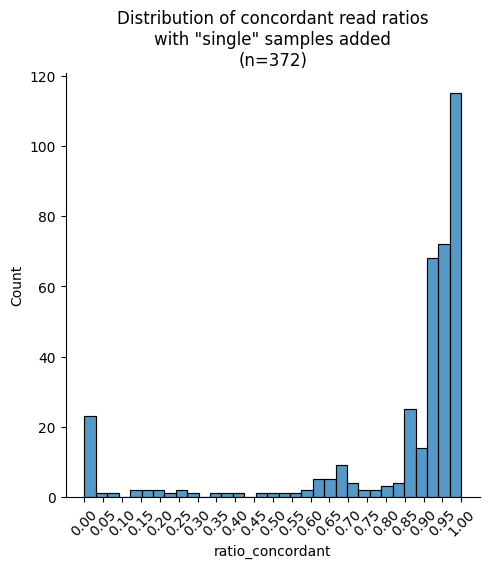

In [9]:
from pathlib import Path
import seaborn as sns

MINED_DATA = (Path().resolve() /
              "0118_135753_libtype_mates_cutoff_09_result.csv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA)

rslt_data = data[data["match_org"] != "Undecided"]
plt.figure(figsize=(5, 5))
g = sns.displot(rslt_data, x="ratio_concordant").set(title='Distribution of concordant read ratios\nwith \"single\" samples added\n(n=372)')
g.set(xticks=np.arange(0,1.05,0.05))
plt.xticks(rotation=45)
plt.show()
g.savefig("1901_dist_concord_3.png", dpi=500)

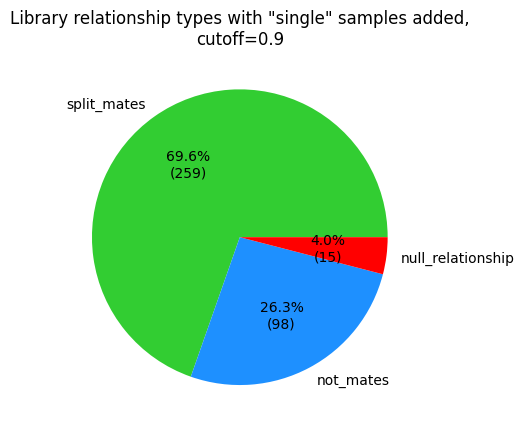

In [78]:
MINED_DATA = (Path().resolve() /
              "0118_135753_libtype_mates_cutoff_09_result.csv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA)

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

rslt_data = data[data["match_org"] != "Undecided"]
df1 = pd.DataFrame(rslt_data["match_type"].value_counts().reset_index())

plt.title("Library relationship types with \"single\" samples added,\ncutoff=0.9")
plt.pie(data=df1,x="match_type", labels='index', colors=['limegreen', 'dodgerblue', 'red'], autopct=autopct_format(df1["match_type"]))
plt.show()

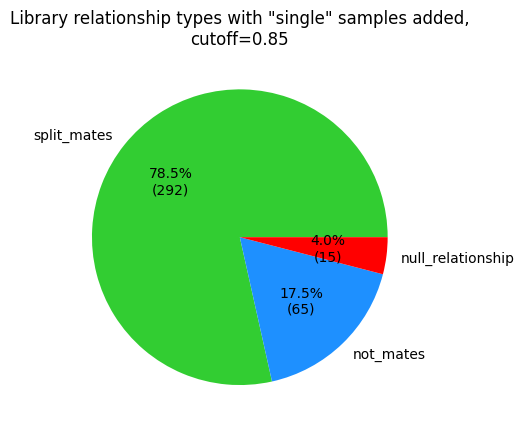

In [83]:
MINED_DATA = (Path().resolve() /
              "0118_180129_libtype_mates_cutoff_085_result.csv")

# Read in the tsv file
data = pd.read_csv(MINED_DATA)

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

rslt_data = data[data["match_org"] != "Undecided"]
df1 = pd.DataFrame(rslt_data["match_type"].value_counts().reset_index())

plt.title("Library relationship types with \"single\" samples added,\ncutoff=0.85")
plt.pie(data=df1,x="match_type", labels='index', colors=['limegreen', 'dodgerblue', 'red'], autopct=autopct_format(df1["match_type"]))
plt.show()

## Barplot for organism mismatch inference

In [5]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

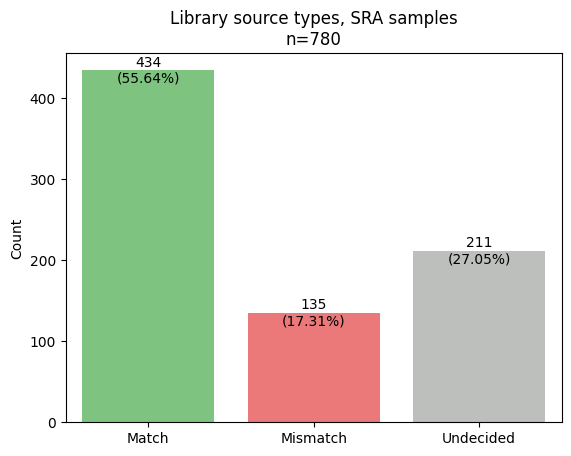

In [41]:
# Your dictionary
d = {'Match': 434, 'Mismatch': 135, 'Undecided': 211}
colors = {'Match': "#15B01A", 'Mismatch': "#FF0000", 'Undecided': "#929591"}
# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a bar plot using seaborn
ax = sns.barplot(x=list(d.keys()), y=list(d.values()), palette=colors, alpha=.6)

# Add labels and title
plt.ylabel('Count')
plt.title('Library source types, SRA samples\nn=780')

# Display the count and percentage values on top of each bar
for p, (count, percent) in zip(ax.patches, zip(d.values(), percentages.values())):
    ax.annotate(f'{count}\n({percent:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Show the plot
plt.savefig("plot_results/2301_library_source_types.png", dpi=500)
plt.show()

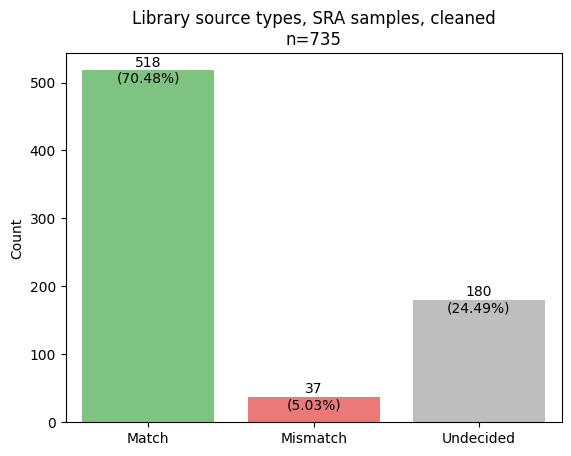

In [42]:
# Your dictionary
d = {'Match': 518, 'Mismatch': 37, 'Undecided': 180}
colors = {'Match': "#15B01A", 'Mismatch': "#FF0000", 'Undecided': "#929591"}
# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a bar plot using seaborn
ax = sns.barplot(x=list(d.keys()), y=list(d.values()), palette=colors, alpha=.6)

# Add labels and title
plt.ylabel('Count')
plt.title('Library source types, SRA samples, cleaned\nn=735')

# Display the count and percentage values on top of each bar
for p, (count, percent) in zip(ax.patches, zip(d.values(), percentages.values())):
    ax.annotate(f'{count}\n({percent:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Show the plot
plt.savefig("plot_results/2301_library_source_types_cleaned.png", dpi=500)
plt.show()

### Mapping results

In [15]:
import pandas as pd
df = pd.read_csv("mismatch_mappings_results_2902.csv")

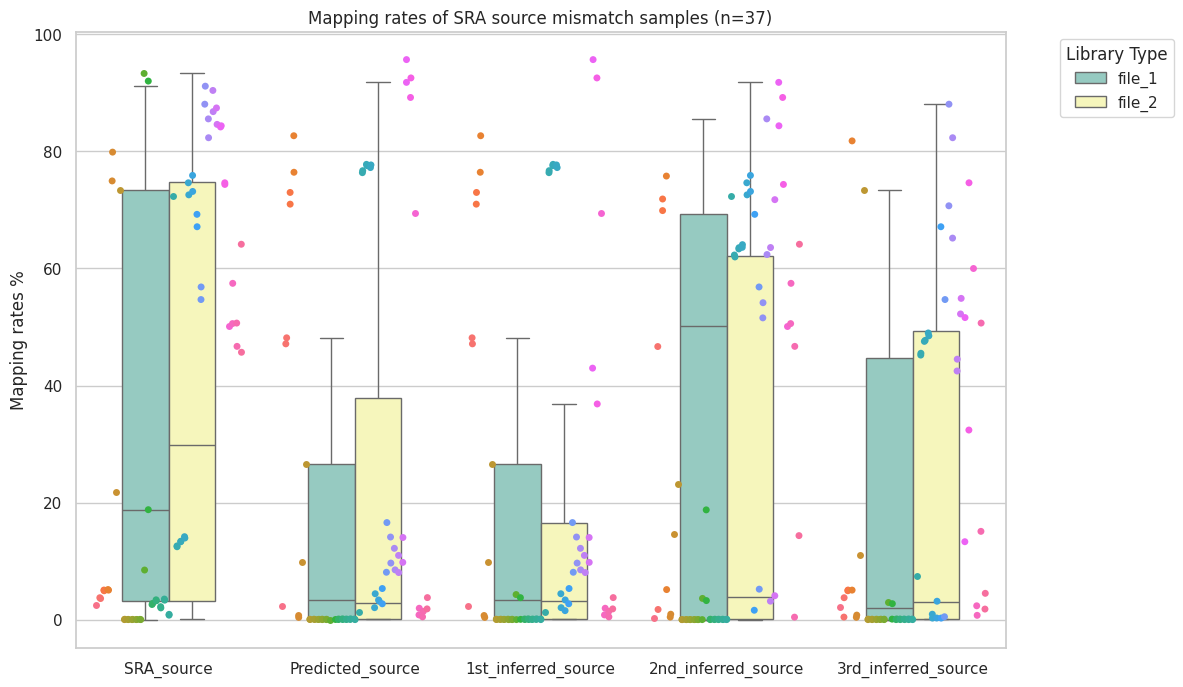

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define sets of columns to melt
columns_set1 = ["org_map_1", "pred_org_map_1", "1_org_1_map", "1_org_2_map", "1_org_3_map", "sample"]
columns_set2 = ["org_map_2", "pred_org_map_2", "2_org_1_map", "2_org_2_map", "2_org_3_map", "sample"]

df_subset_1 = df[columns_set1].copy()
df_subset_1['lib_type'] = 'file_1'
df_subset_1['sample_lib_type'] = df_subset_1['sample'] + '_file_1'
df_subset_2 = df[columns_set2].copy()
df_subset_2['lib_type'] = 'file_2'
df_subset_2['sample_lib_type'] = df_subset_1['sample'] + '_file_2'

df_subset_1.rename(columns={
    "org_map_1": "SRA_source",
    "pred_org_map_1": "Predicted_source",
    "1_org_1_map": "1st_inferred_source",
    "1_org_2_map": "2nd_inferred_source",
    "1_org_3_map": "3rd_inferred_source"
}, inplace=True)

df_subset_2.rename(columns={
    "org_map_2": "SRA_source",
    "pred_org_map_2": "Predicted_source",
    "2_org_1_map": "1st_inferred_source",
    "2_org_2_map": "2nd_inferred_source",
    "2_org_3_map": "3rd_inferred_source"
}, inplace=True)

# Melt each set of columns separately
df_melted_set1 = df_subset_1.melt(id_vars=["sample", "lib_type", "sample_lib_type"], var_name='Category', value_name='Value')
df_melted_set2 = df_subset_2.melt(id_vars=["sample", "lib_type", "sample_lib_type"], var_name='Category', value_name='Value')

# Concatenate the melted DataFrames
df_melted = pd.concat([df_melted_set1, df_melted_set2], ignore_index=True)

# Creating the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 8))

# Boxplot in the background
sns.boxplot(x='Category', y='Value', data=df_melted, ax=ax, palette='Set3', hue="lib_type", showfliers=False, width=0.5)

# Categorical plot with points
sns.stripplot(x='Category', y='Value', data=df_melted, hue='sample', dodge=True, ax=ax, jitter=True, legend=False)

# Move the legend for lib_type to the outside
plt.legend(title='Library Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding title and labels
plt.title("Mapping rates of SRA source mismatch samples (n=37)")
plt.xlabel("")
plt.ylabel("Mapping rates %")

plt.show()


In [1]:
@M01761:794:000000000-DMNF4:1:1101:13865:1928 1:N:0:CGCTCATT
       EAS139:136:FC706VJ:2:2104:15343:197393 1:Y:18:ATCACG


@SRR11971558:136:FC706VJ:2:2104:15343:197394 2:N:18:ATCACG

SyntaxError: invalid syntax (1745016537.py, line 1)

In [3]:
import re
from enum import (
    Enum,
    IntEnum,
)

In [4]:
SeqIdFormats = Enum(  # type: ignore
    # Source information:
    # https://support.illumina.com/help/BaseSpace_OLH_009008/Content/Source/Informatics/BS/FileFormat_FASTQ-files_swBS.htm
    # https://en.wikipedia.org/wiki/FASTQ_format#Illumina_sequence_identifiers
    value='SeqIdFormats',
    names=[
        # Illumina Casava >=1.8
        # example EAS139:136:FC706VJ:2:2104:15343:197393 1:Y:18:ATCACG
        (
            'Casava >=1.8',
            re.compile(
                r'(?P<prefix>\w+:\d+:\w+:\d+:\d+:\d+:\d+(:[ACGTN]\+[ACGTN])?)'
                r'('
                r'(?P<linker> )'
                r'(?P<mate>[12])'
                r'(?P<suffix>:[YN]:\d*[02468]:([ACGTN]|\d)+)'
                r')?'
            )
        ),
        # Illumina Casava <1.8
        # example: HWUSI-EAS100R:6:73:941:1973#0/1
        (
            'Casava <1.8',
            re.compile(
                r'(?P<prefix>[\w-]+:\d+:\d+:\d+:\d+#([ACGTN|\d])+)'
                r'('
                r'(?P<linker>/)'
                r'(?P<mate>[12])'
                r'(?P<suffix>)'
                r')?'
            )
        ),
    ],
)

In [6]:
SeqIdFormats

<enum 'SeqIdFormats'>

In [14]:
seq_id="@M01761:794:000000000DMNF4:1:1101:13865:1928 1:N:0:CGCTCATT"
# seq_id="@SRR11971558:136:FC706VJ:2:2104:15343:197394 2:N:18:ATCACG"
for seq_id_format in SeqIdFormats:
    regex=seq_id_format.value
    match = re.search(regex, seq_id)
    print(match)

<re.Match object; span=(1, 59), match='M01761:794:000000000DMNF4:1:1101:13865:1928 1:N:0>
None


### Removed weird transcripts

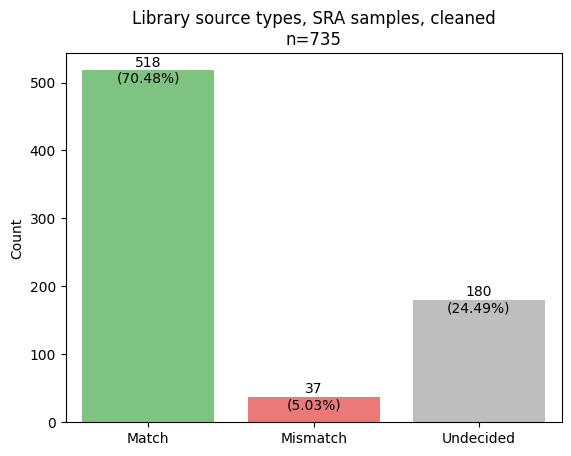

In [2]:
# Your dictionary
d = {'Match': 518, 'Mismatch': 37, 'Undecided': 180}
colors = {'Match': "#15B01A", 'Mismatch': "#FF0000", 'Undecided': "#929591"}
# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a bar plot using seaborn
ax = sns.barplot(x=list(d.keys()), y=list(d.values()), palette=colors, alpha=.6)

# Add labels and title
plt.ylabel('Count')
plt.title('Library source types, SRA samples, cleaned\nn=735')

# Display the count and percentage values on top of each bar
for p, (count, percent) in zip(ax.patches, zip(d.values(), percentages.values())):
    ax.annotate(f'{count}\n({percent:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Show the plot
plt.savefig("plot_results/2003_library_source_types_cleaned.png", dpi=500)
plt.show()

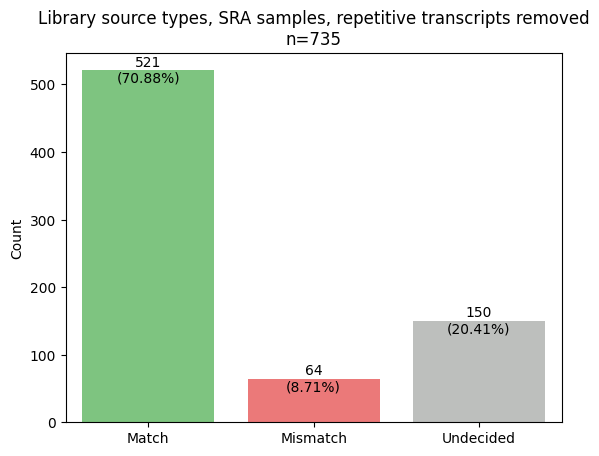

In [3]:
# Your dictionary
d = {'Match': 521, 'Mismatch': 64, 'Undecided': 150}
colors = {'Match': "#15B01A", 'Mismatch': "#FF0000", 'Undecided': "#929591"}
# Convert counts to percentages
total = sum(d.values())
percentages = {key: (value / total) * 100 for key, value in d.items()}

# Create a bar plot using seaborn
ax = sns.barplot(x=list(d.keys()), y=list(d.values()), palette=colors, alpha=.6)

# Add labels and title
plt.ylabel('Count')
plt.title('Library source types, SRA samples, repetitive transcripts removed\nn=735')

# Display the count and percentage values on top of each bar
for p, (count, percent) in zip(ax.patches, zip(d.values(), percentages.values())):
    ax.annotate(f'{count}\n({percent:.2f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Show the plot
plt.savefig("plot_results/2003_library_source_types_trimmed.png", dpi=500)
plt.show()

In [6]:
fixed_org_df = pd.read_csv("0122_180432_org_check_result_fixed_org.csv")
trimmed_transc_df = pd.read_csv("trimmed_transcripts_result.csv")

In [17]:
mismatch_fixed_org_df = fixed_org_df[fixed_org_df['match_org'] == 'Mismatch']
len(mismatch_fixed_org_df)
undecided_fixed_org_df = fixed_org_df[fixed_org_df['match_org'] == 'Undecided']
len(undecided_fixed_org_df)
# filtered_fixed_org_df = fixed_org_df[fixed_org_df['match_org'].isin(['Mismatch', 'Undecided'])]

In [18]:
mismatch_trimmed_transc_df = trimmed_transc_df[trimmed_transc_df['match_org'] == 'Mismatch']
undecided_trimmed_transc_df = trimmed_transc_df[trimmed_transc_df['match_org'] == 'Undecided']
# filtered_trimmed_transc_df = trimmed_transc_df[trimmed_transc_df['match_org'].isin(['Mismatch', 'Undecided'])]

In [21]:
merged_df = pd.merge(mismatch_fixed_org_df, mismatch_trimmed_transc_df, on='sample', how='inner')
merged_df

,sample,read_count_x,layout_x,sra_x,org_x,orient_x,adapter_x,length_min_1_x,length_max_1_x,length_2_x,...,pred_length_mode_1_y,pred_length_min_2_y,pred_length_max_2_y,pred_length_mean_2_y,pred_length_median_2_y,pred_length_mode_2_y,match_org_y,match_orient_y,match_adapter_y,match_length_y
0,SRR922417,71377290,SE,SRX316167,obarthii,NaN,NaN,NaN,50,NaN,...,50,NaN,NaN,NaN,NaN,NaN,Mismatch,No_metadata,No_metadata,Match
1,SRR9289060,21988539,PE,SRX6058708,pchabaudi,ISR,NaN,NaN,302,NaN,...,151,151.0,151.0,151.0,151.0,151.0,Mismatch,Match,Undecided,Match
2,SRR9289061,37586477,PE,SRX6058708,pchabaudi,ISR,NaN,NaN,202,NaN,...,101,101.0,101.0,101.0,101.0,101.0,Mismatch,Match,Undecided,Match
3,SRR9289074,8512902,PE,SRX6058720,pchabaudi,ISR,NaN,NaN,202,NaN,...,101,101.0,101.0,101.0,101.0,101.0,Mismatch,Match,No_metadata,Match
4,SRR23712176,18855405,PE,SRX19573750,athaliana,NaN,NaN,NaN,300,NaN,...,150,150.0,150.0,150.0,150.0,150.0,Mismatch,Undecided,No_metadata,Match
5,SRR22254174,20362326,SE,SRX18230713,dmelanogaster,NaN,NaN,NaN,50,NaN,...,50,NaN,NaN,NaN,NaN,NaN,Mismatch,No_metadata,No_metadata,Match
6,SRR22245477,21472797,SE,SRX18222201,dmelanogaster,NaN,NaN,NaN,50,NaN,...,50,NaN,NaN,NaN,NaN,NaN,Mismatch,No_metadata,No_metadata,Match
7,SRR22904801,89236,PE,SRX18862318,ggallus,NaN,NaN,NaN,493,NaN,...,242,251.0,251.0,251.0,251.0,251.0,Mismatch,Undecided,Undecided,Match
8,SRR22904821,93731,PE,SRX18862298,ggallus,NaN,NaN,NaN,495,NaN,...,244,251.0,251.0,251.0,251.0,251.0,Mismatch,Undecided,Undecided,Match
9,SRR22904820,99727,PE,SRX18862299,ggallus,NaN,NaN,NaN,494,NaN,...,243,251.0,251.0,251.0,251.0,251.0,Mismatch,Undecided,Undecided,Match


In [22]:
merged_df = pd.merge(undecided_fixed_org_df, undecided_trimmed_transc_df, on='sample', how='inner')
merged_df

,sample,read_count_x,layout_x,sra_x,org_x,orient_x,adapter_x,length_min_1_x,length_max_1_x,length_2_x,...,pred_length_mode_1_y,pred_length_min_2_y,pred_length_max_2_y,pred_length_mean_2_y,pred_length_median_2_y,pred_length_mode_2_y,match_org_y,match_orient_y,match_adapter_y,match_length_y
0,SRR1284049,17461217,SE,SRX540831,bcinerea,NaN,NaN,NaN,51,NaN,...,51,NaN,NaN,NaN,NaN,NaN,Undecided,Undecided,Undecided,Match
1,SRR9289073,14849073,PE,SRX6058720,pchabaudi,ISR,NaN,NaN,302,NaN,...,151,151.0,151.0,151.00,151.0,151.0,Undecided,Match,No_metadata,Match
2,SRR9289075,35641963,PE,SRX6058720,pchabaudi,ISR,NaN,NaN,302,NaN,...,151,151.0,151.0,151.00,151.0,151.0,Undecided,Undecided,No_metadata,Match
3,SRR10393299,4851478,PE,SRX7093683,pabelii,ISR,NaN,NaN,430,NaN,...,251,35.0,251.0,246.86,250.0,251.0,Undecided,Undecided,No_metadata,Match
4,SRR12414066,4095901,PE,SRX8910237,pabelii,NaN,CTGTCTCTTATACACATCT,NaN,16,50.0,...,16,50.0,50.0,50.00,50.0,50.0,Undecided,Undecided,Undecided,Match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,SRR18325090,22841092,SE,SRX14462556,xtropicalis,NaN,NaN,NaN,75,NaN,...,75,NaN,NaN,NaN,NaN,NaN,Undecided,Undecided,No_metadata,Match
155,SRR18325089,20985456,SE,SRX14462557,xtropicalis,NaN,NaN,NaN,75,NaN,...,75,NaN,NaN,NaN,NaN,NaN,Undecided,Undecided,No_metadata,Match
156,SRR18325087,22555328,SE,SRX14462559,xtropicalis,NaN,NaN,NaN,75,NaN,...,75,NaN,NaN,NaN,NaN,NaN,Undecided,Undecided,No_metadata,Match
157,SRR22138528,7423013,PE,SRX18117889,xtropicalis,NaN,NaN,NaN,202,NaN,...,101,101.0,101.0,101.00,101.0,101.0,Undecided,No_metadata,No_metadata,Match
